In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
!ls "/content/drive/My Drive"
!unzip "/content/drive/My Drive/darknetW/darknet.zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: __MACOSX/darknet/data/labels/._wshoes (84).txt  
checkdir error:  darknet exists but is not directory
                 unable to process darknet/data/labels/wshoes (532).txt.
  inflating: __MACOSX/darknet/data/labels/._wshoes (532).txt  
checkdir error:  darknet exists but is not directory
                 unable to process darknet/data/labels/wshoes (162).txt.
  inflating: __MACOSX/darknet/data/labels/._wshoes (162).txt  
checkdir error:  darknet exists but is not directory
                 unable to process darknet/data/labels/wshoes (498).txt.
  inflating: __MACOSX/darknet/data/labels/._wshoes (498).txt  
checkdir error:  darknet exists but is not directory
                 unable to process darknet/data/labels/wshoes (477).txt.
  inflating: __MACOSX/darknet/data/labels/._wshoes (477).txt  
checkdir error:  darknet exists but is not directory
                 unable to process darknet/data/labels/hill (380).txt.
  inflating: __MACOSX/

In [0]:
%cd /content/darknet
#!rm -rf backup
!make
!chmod +x ./darknet

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/

In [0]:
!rm /content/darknet/backup -r
!ln -s /content/drive/'My Drive'/backup /content/darknet

In [0]:
!sudo apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 0s (3,820 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 144433 files and directories curr

In [0]:
!dos2unix ./data/train.txt
!dos2unix ./data/val.txt
!dos2unix ./data/yolo.data
!dos2unix ./data/yolo.names
!dos2unix ./cfg/yolov3_custom_train.cfg

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/val.txt to Unix format...
dos2unix: converting file ./data/yolo.data to Unix format...
dos2unix: converting file ./data/yolo.names to Unix format...
dos2unix: converting file ./cfg/yolov3_custom_train.cfg to Unix format...


In [0]:
%cd /content/darknet
%ls

/content/darknet
backup@   examples/       LICENSE       LICENSE.meta  obj/       scripts/
cfg/      include/        LICENSE.fuck  LICENSE.mit   python/    src/
darknet*  libdarknet.a    LICENSE.gen   LICENSE.v1    README.md
data/     libdarknet.so*  LICENSE.gpl   Makefile      results/


In [0]:

#! ./darknet detector train data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_900.weights
!./darknet detector train data/yolo.data cfg/yolov3_custom_train.cfg darknet53.conv.74

yolov3_custom_train
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8   

In [0]:
!unzip "/content/drive/My Drive/a.zip"
!ls "content/drive/My Drive"

Archive:  /content/drive/My Drive/a.zip
  inflating: A1.jpg                  
  inflating: A2.jpg                  
ls: cannot access 'content/drive/My Drive': No such file or directory


In [0]:
#!./darknet detector test cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_900.weight data/600.jpg
#./darknet detector test data/obj.data cfg/yolov3.cfg backup/yolov3_last.weights data/img/output-000000598.jpg
#!./darknet detector cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_900.weight
#!./darknet detect cfg/yolov3_custom_train_900.weights/content/drive/My Drive/test
#!./darknet detector test data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_5000.weights -thresh 0.25 T10.jpg
!./darknet detector test data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_5000.weights -thresh 0.25 A1.jpg A2.jpg > result.txt

Cannot load image "data/labels/32_0.png"
Cannot load image "data/labels/33_0.png"
Cannot load image "data/labels/34_0.png"
Cannot load image "data/labels/35_0.png"
Cannot load image "data/labels/36_0.png"
Cannot load image "data/labels/37_0.png"
Cannot load image "data/labels/38_0.png"
Cannot load image "data/labels/39_0.png"
Cannot load image "data/labels/40_0.png"
Cannot load image "data/labels/41_0.png"
Cannot load image "data/labels/42_0.png"
Cannot load image "data/labels/43_0.png"
Cannot load image "data/labels/44_0.png"
Cannot load image "data/labels/45_0.png"
Cannot load image "data/labels/46_0.png"
Cannot load image "data/labels/47_0.png"
Cannot load image "data/labels/48_0.png"
Cannot load image "data/labels/49_0.png"
Cannot load image "data/labels/50_0.png"
Cannot load image "data/labels/51_0.png"
Cannot load image "data/labels/52_0.png"
Cannot load image "data/labels/53_0.png"
Cannot load image "data/labels/54_0.png"
Cannot load image "data/labels/55_0.png"
Cannot load imag

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

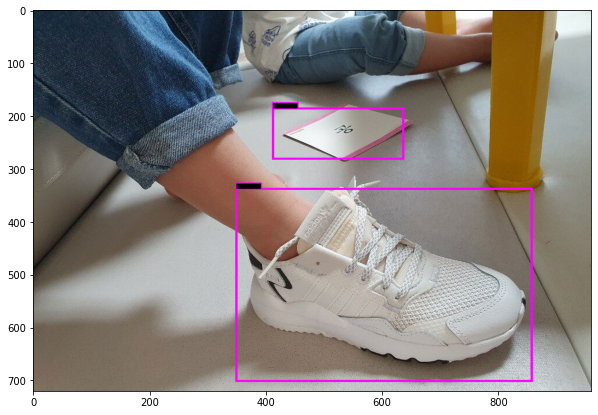

In [0]:
fig,ax=plt.subplots(figsize=(10,7))
img=cv2.imread('predictions.jpg',cv2.IMREAD_COLOR)
b,g,r=cv2.split(img)
img=cv2.merge([r,g,b])
ax.imshow(img,aspect='auto')

In [0]:
!./darknet detector test data/yolo.names cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_900.weight

names: Using default 'data/names.list'
Couldn't open file: data/names.list
